# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [252]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ser = pd.read_csv('example_retail_sales.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)
Ser =  np.log(Ser)

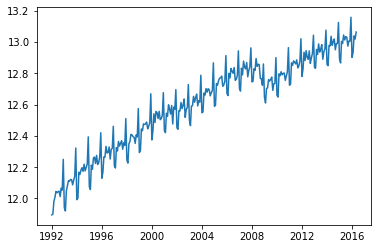

In [163]:
plt.plot(Ser);

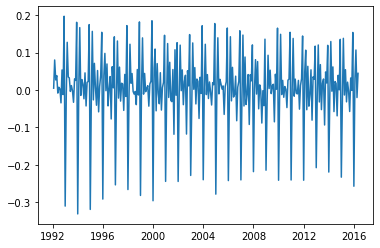

In [164]:
plt.plot(Ser.diff());

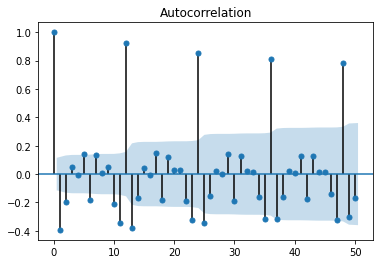

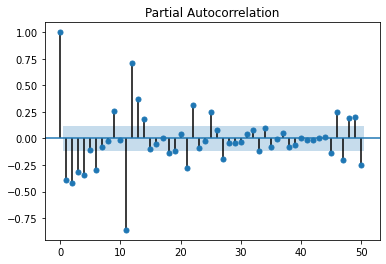

In [11]:
# Realizamos las graficas de Correlaciones
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Ser_diff=Ser.diff()
Ser_diff=Ser_diff[1:293]

plot_acf(Ser_diff, lags=50)
plot_pacf(Ser_diff, lags=50);


In [240]:

# Generamos un grid de evaluacion para obtener los mejores parametros para el modelo ARIMA

from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

 
# Se define esta funcion que genera un melo ARIMA, con los argumentos de un dataset y un orden(p,d,q)
def evaluate_arima_model(X, arima_order):
	# Se dividie el dataset en train y test
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# Se realizan las predicciones
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# Se calcula media del cuadrado del error
	error = mean_squared_error(test, predictions)
	# La funcion retorna el error
	return error
 
# Se define esta funcion que evalua varias combinaciones de p, d y q para un dataset y evalua sus correspondientes modelos ARIMA, y guarda el valor del orden que minimiza el MSE
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
p_values = range(0,12)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(Ser.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.135
ARIMA(0, 0, 1) MSE=0.050
ARIMA(0, 0, 2) MSE=0.030
ARIMA(0, 1, 0) MSE=0.008
ARIMA(0, 1, 1) MSE=0.006
ARIMA(0, 1, 2) MSE=0.006
ARIMA(1, 0, 0) MSE=0.009
ARIMA(1, 0, 1) MSE=0.005
ARIMA(1, 0, 2) MSE=0.005
ARIMA(1, 1, 0) MSE=0.007
ARIMA(1, 1, 1) MSE=0.006
ARIMA(1, 1, 2) MSE=0.006
ARIMA(2, 0, 0) MSE=0.007
ARIMA(2, 0, 1) MSE=0.005
ARIMA(2, 0, 2) MSE=0.005
ARIMA(2, 1, 0) MSE=0.006
ARIMA(2, 1, 1) MSE=0.006
ARIMA(2, 1, 2) MSE=0.006
ARIMA(3, 0, 0) MSE=0.006
ARIMA(3, 0, 1) MSE=0.005
ARIMA(3, 1, 0) MSE=0.005
ARIMA(3, 1, 1) MSE=0.006
ARIMA(3, 1, 2) MSE=0.006
ARIMA(4, 0, 0) MSE=0.005
ARIMA(4, 0, 1) MSE=0.005
ARIMA(4, 1, 0) MSE=0.005
ARIMA(4, 1, 1) MSE=0.006
ARIMA(4, 1, 2) MSE=0.005
ARIMA(5, 0, 0) MSE=0.005
ARIMA(5, 0, 1) MSE=0.005
ARIMA(5, 0, 2) MSE=0.005
ARIMA(5, 1, 0) MSE=0.005
ARIMA(5, 1, 1) MSE=0.006
ARIMA(6, 0, 0) MSE=0.005
ARIMA(6, 0, 1) MSE=0.005
ARIMA(6, 1, 0) MSE=0.005
ARIMA(6, 1, 1) MSE=0.005
ARIMA(7, 0, 0) MSE=0.004
ARIMA(7, 0, 1) MSE=0.004
ARIMA(7, 1, 0) MSE=0.005


In [241]:
p_values = range(12,15)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(Ser.values, p_values, d_values, q_values)

ARIMA(12, 0, 0) MSE=0.002
ARIMA(12, 0, 1) MSE=0.001


In [165]:
# Hallado el orden que mejor modela los datos (Reduciendo el MSE),prodeceremos a ajustar el modelo

# fit model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Ser, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  292
Model:                ARIMA(12, 1, 0)   Log Likelihood                 669.831
Method:                       css-mle   S.D. of innovations              0.023
Date:                Mon, 22 Jun 2020   AIC                          -1311.661
Time:                        14:59:37   BIC                          -1260.187
Sample:                    02-01-1992   HQIC                         -1291.043
                         - 05-01-2016            

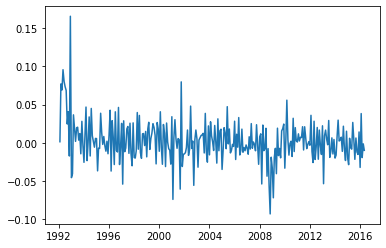

In [166]:
import matplotlib.pyplot as plt

residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)

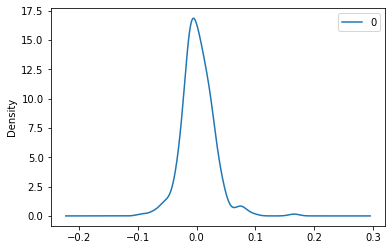

0
count  292.000000
mean     0.002070
std      0.027387
min     -0.093380
25%     -0.012941
50%      0.001065
75%      0.017890
max      0.165781


In [167]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [255]:
# Tomamos valores de la serie (solo valores)
X = Ser.values
# Definir el tamaño (numero de datos) de la muestra
size = int(len(X) * 0.95)
# Parte el train y test
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()


In [168]:
# Generamos predicciones del ultimo 5% de la base de datos

for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast() #pronostica un solo dato
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=12.998494, expected=13.003828
predicted=12.997551, expected=12.990470
predicted=13.053449, expected=13.044650
predicted=12.986102, expected=13.013060
predicted=13.029166, expected=13.033991
predicted=13.054215, expected=13.030993
predicted=12.966953, expected=12.973671
predicted=13.018540, expected=13.005737
predicted=13.020025, expected=13.004721
predicted=13.143848, expected=13.158219
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
predicted=12.934961, expected=12.901537
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
predicted=12.892856, expected=12.932543
predicted=13.059432, expected=13.039184
predicted=13.020703, expected=13.019078
predicted=13.073777, exp

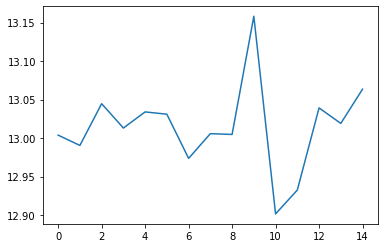

In [187]:
# Graficamos las predicciones de los logaritmos de las ventas
plt.plot(test)
plt.plot(predictions, color="red");

Procederemos ahora a obtener los valores de las ventas

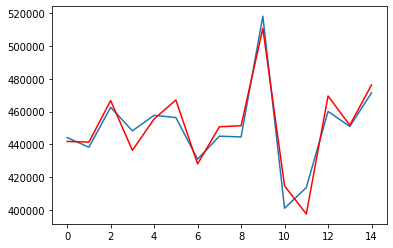

In [171]:
sales_pred = np.exp(predictions)
sales_test = np.exp(test)
plt.plot(sales_test)
plt.plot(sales_pred, color="red");

Generaremos la prediccion para los proximos 6 meses con ARIMA

In [386]:
# Importamos la base
Ser = pd.read_csv('example_retail_sales.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)
Ser =  np.log(Ser)

In [387]:
# Tomamos valores de la serie (solo valores)
X = Ser.values

history = [x for x in X]

# Definimos la prediccion
predictions = list()

for t in range(1,7):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast() #pronostica un solo dato
	yhat = output[0]
	predictions.append(yhat[0])
	history.append(yhat[0])
	print('predicted=%f' % (yhat))

predicted=13.028964
predicted=13.051185
predicted=13.055647
predicted=12.999866
predicted=13.036623
predicted=13.044663


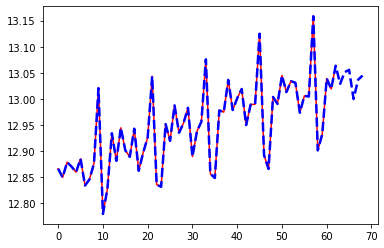

In [392]:
#Graficamos los valores de la prediccion de 6 meses hacia adelane

plt.plot(Ser.values[230:],color="red")
plt.plot(history[230:],color="blue",linestyle="--",linewidth=2.5);

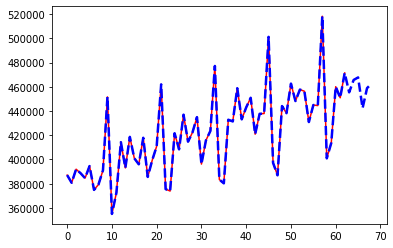

In [391]:
#Graficamos los valores de la prediccion de las ventas 6 meses hacia adelane
plt.plot(np.exp(Ser.values[230:]),color="red")
plt.plot(np.exp(history[230:]),color="blue",linestyle="--",linewidth=2.5);



# Modelado con Propthet

In [667]:
# Importamos las librerias necesarias
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [668]:
# Cargamos la base de datos
Sales = pd.read_csv('example_retail_sales.csv')

# Estandarizamos las ventas con el logaritmo natural
Sales.y =  np.log(Sales.y )
Sales.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


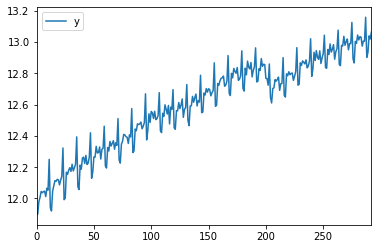

In [670]:
# Graficamos la serie

Sales.plot();

In [671]:
# Dividimos la base de datos

X = Sales.values
size = int(len(X) * 0.95)
train, test_pro = X[0:size], X[size:len(X)]
history_Pro = [x for x in train]
predictions_Pro = list()
history_Pro = pd.DataFrame(history_Pro,columns=("ds","y"))

In [672]:
for t in range(len(test)):
    model_Pro = Prophet()
    model_Pro.fit(history_Pro)
    future = m.make_future_dataframe(periods=t+1, freq='M')
    forecast = m.predict(future)
    yhat = forecast.yhat.tail(1)
    predictions_Pro.append(yhat)
    obs = test_pro[t]
    ldf = pd.DataFrame([(obs[0],obs[1])],columns=("ds","y"))
    history_Pro = history_Pro.append(ldf, ignore_index=True)
    print("Dato # %f,predicted=%f, expected=%f" % (t,yhat, obs[1]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Dato # 0.000000,predicted=13.057744, expected=13.003828
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Dato # 1.000000,predicted=13.057717, expected=12.990470
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Dato # 2.000000,predicted=13.082380, expected=13.044650
INFO:fbp

In [673]:
# Convertimos los resultados en variables graficables
pred_prob = list()
for i in range(len(predictions_Pro)):
    pred_prob.append(predictions_Pro[i].values)

test_pro = test_pro[:,1]

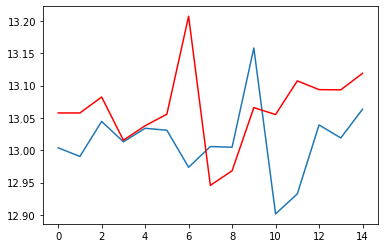

In [674]:
plt.plot(test_pro)
plt.plot(pred_prob, color = "red")

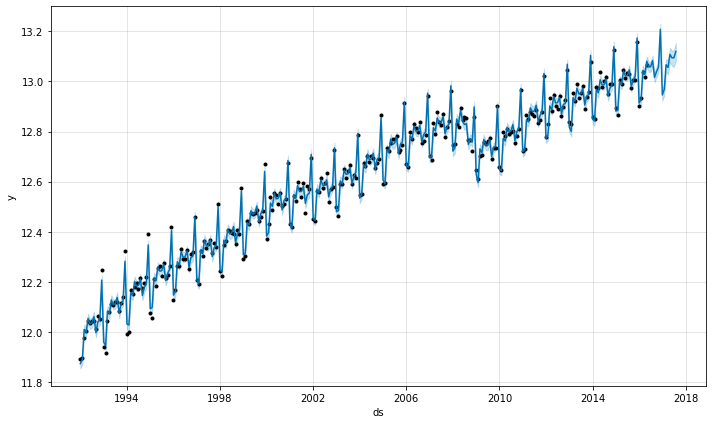

In [675]:
fig1 = m.plot(forecast)

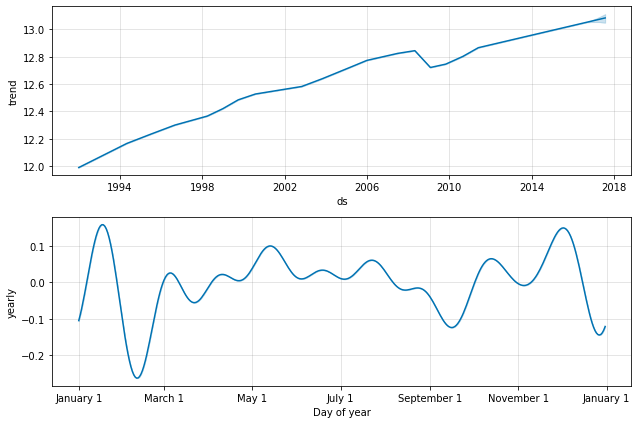

In [676]:
# Revisamos la tendencia general
m.plot_components(forecast);

Generaremos la prediccion para los proximos 6 meses con PROPHET

In [680]:
# Cargamos la base de datos
Sales = pd.read_csv('example_retail_sales.csv')

# Estandarizamos las ventas con el logaritmo natural
Sales.y =  np.log(Sales.y )

In [681]:
# Tomamos valores de la serie (solo valores)
X = Sales.values
size = int(len(X) * 1)
train = X[0:size]
history_Pro = [x for x in train]
predictions_Pro = list()
history_Pro = pd.DataFrame(history_Pro,columns=("ds","y"))

In [682]:
for t in range(1,7):
    model_Pro = Prophet()
    model_Pro.fit(history_Pro)
    future = m.make_future_dataframe(periods=t, freq='M')
    forecast = m.predict(future)
    yhat = forecast.yhat.tail(1)
    ts=pd.to_datetime(str(future.values[-1][0]))
    d = ts.strftime('%Y-%m-%d')
    ldf = pd.DataFrame([(d,yhat.values[0])],columns=("ds","y"))
    predictions_Pro.append(yhat.values[0])
    history_Pro = history_Pro.append(ldf, ignore_index=True)
    print('predicted=%f' % (yhat))


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
predicted=13.057744
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
predicted=13.057717
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
predicted=13.082380
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbproph

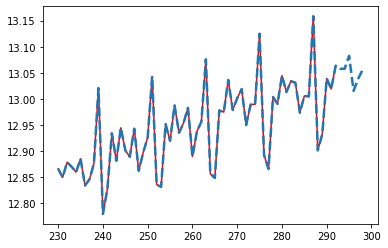

In [683]:
plt.plot(Sales.y[230:],color="red")
plt.plot(history_Pro.y[230:],linestyle="--",linewidth=2.5);



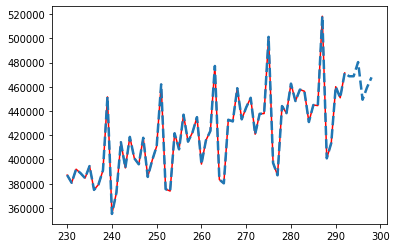

In [684]:
#Graficamos los valores de la prediccion de las ventas 6 meses hacia adelane
plt.plot(np.exp(Sales.y[230:]),color="red")
plt.plot(np.exp(history_Pro.y[230:]),linestyle="--",linewidth=2.5);

Procedemos a comparar los dos resultados

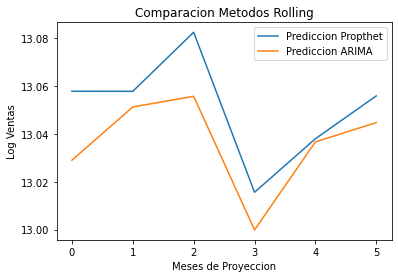

In [685]:
plt.plot(predictions_Pro, label='Prediccion Propthet')
plt.plot(predictions, label='Prediccion ARIMA')

plt.title("Comparacion Metodos Rolling")
plt.xlabel("Meses de Proyeccion")
plt.ylabel("Log Ventas")
plt.legend();

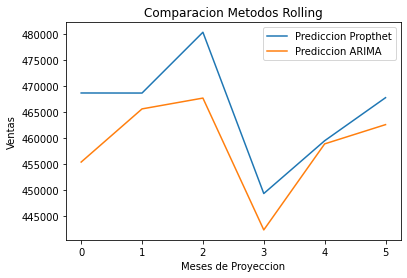

In [687]:
plt.plot(np.exp(predictions_Pro), label='Prediccion Propthet')
plt.plot(np.exp(predictions), label='Prediccion ARIMA')

plt.title("Comparacion Metodos Rolling")
plt.xlabel("Meses de Proyeccion")
plt.ylabel("Ventas")
plt.legend();